In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from IPython.display import Image
from IPython.display import display

# In this notebook

# References 

- [Introduction to statistical learning] (http://fs2.american.edu/alberto/www/analytics/ISLRLectures.html)
- [Elements of statistical learning] (https://web.stanford.edu/~hastie/ElemStatLearn/)
- [Machine learning] (https://www.coursera.org/learn/machine-learning)

# (A) Fundamental functions

#### Dummify

In [40]:
def dummify(x):
    '''
    Input: datafrmae of input variables 
    Return: 
        - Dataframe of predictors with all the cat variable turned into dummies
        - List of numerical variables 
        - List of categorical variales 
    '''
    # Get the dummy variables for categorical variables 
    x_all_num = pd.get_dummies(x, drop_first=True)
    
    # Extract the numerical variable names and the categorical variable names  
    clmns     = list(x.columns)
    num_clmns = list(x._get_numeric_data().columns)
    [clmns.remove(num) for num in num_clmns]
    
    
    return x_all_num , num_clmns , clmns

#### Standardize

In [41]:
def Standardize(x_all_num):
    '''
    Input: Dataframe of the predictors (does not include the bias term)
    Output: Standardized predictors along with the bias term
    '''   
    means  = np.mean(x_all_num, axis=0)
    stds   = np.std(x_all_num, axis=0) 
    stan_x = (x_all_num - means) / stds
    stan_x.insert(0,'Bias',1)
    X      = stan_x
    m , n  = X.shape[0] , X.shape[1]
    return X, m, n, means.values, stds.values

#### Gradient descent

#### Part 1: Cost and Gradient

In [42]:
def CostGrad(y_hat, y , X, lambda_L2,  W):
    '''
    Input: 
        - y_hat: The fitted response variable
        - y    : The true response variable
        - X    : The data frame of predictors
        - m    : The number of samples (examples)
    Output: cost and gradient 
    '''
    m , n = X.shape[0] , X.shape[1]
    
    ZeroOnes = np.ones((n,1))
    ZeroOnes[0] = 0
    Delta = (y_hat[0] - y[y.columns[0]]).values.reshape(-1,1)
    
    # Mean squared error plus regularization
    
    cost  = (1/2/m)*sum(Delta**2)   + (lambda_L2/2/m)*sum( (W*ZeroOnes)**2  )
    grad  = (1/m)  *(Delta.T @ X).T + (lambda_L2/m)*W*ZeroOnes  

    return cost, grad

#### Part 2: Gradient descent iteration

In [43]:
def GD(X, y , N_iter, alpha, lambda_L2): 
    '''
    Input: 
        - X      : Dataframe of predictors/featuers
        - y      : True response variable (ground truth)
        - N_iter : Number of iterations in gradient descent 
        - alpha  : correction factor in gradient descent 
    Output: Learned parameters
    '''
    
    m , n = X.shape[0] , X.shape[1] 
    W     = (np.random.randn(n)/100).reshape(-1,1)   # Initialize the  weights
    for ii in range(N_iter):
    
        y_hat       = X@W
        cost, grad  = CostGrad(y_hat, y, X, lambda_L2, W)
        W          -= alpha * grad        
    return W

#### Normal equation

In [44]:
def NormalEq(X, y, lambda_L2): 
    '''
    Input: 
        - X  : Dataframe of the predictor/features  
        - y  : The response variables (ground truth)
    Output: 
        - W      : Learned parameters
        - y_hat  : Fitted function 
    '''
    Ip = np.eye(X.shape[1])
    Ip[0,0] = 0         
    W = ( np.linalg.pinv(X.T@X + lambda_L2*Ip) @X.T ) @ y
    y_hat = X@W
    
    return W , y_hat

# (B) Portland housing data

In [45]:
# Load the credit data 
print('Original DataFrame', 10*'-')
DF = pd.read_csv('ex1data2.txt', sep = ',', header=None) 
display(DF.head())

# -----------------------------------------------------

# Predictor variables
print(' ')
print('Predictors', 10*'-')
x = DF.iloc[: , :-1]
display(x.head())

# -----------------------------------------------------

# Response variables
print(' ')
print('Response variable', 10*'-')
y = DF.iloc[: , -2:].drop(list(DF.columns)[-2], axis=1)
display(y.head())

Original DataFrame ----------


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


 
Predictors ----------


,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


 
Response variable ----------


,2
0,399900
1,329900
2,369000
3,232000
4,539900


### Dummify the cat variables and return the list of num , cat variable names 

In [46]:
x_all_num , nums, cats = dummify(x)

display(nums)
display(cats)
display(x_all_num.head())

[0, 1]

[]

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


### Standardize the featuers dataframe

In [47]:
X, m, n, means, stds = Standardize(x_all_num)
display(X.head())
print('m:', m)
print('n:', n)
print('means:', means)
print('stds:',  stds)

,Bias,0,1
0,1,0.131415,-0.226093
1,1,-0.509641,-0.226093
2,1,0.507909,-0.226093
3,1,-0.743677,-1.554392
4,1,1.271071,1.102205


m: 47
n: 3
means: [2000.68085106    3.17021277]
stds: [7.86202619e+02 7.52842809e-01]


# Use gradient descent to learn the fitting parameters

In [48]:
W = GD(X, y , N_iter=100, alpha=0.27, lambda_L2=0)
#### Example prediction below is the same as the one used in Andrew Ng's Coursera course
print('Price prediction for a Portland house with 3 bedrooms and 1650 sq-ft area in [$]:')
np.round( W[0] + W[1]*( (1650 - means[0]) /stds[0] ) + W[2]*( (3 - means[1]) /stds[1]),1)[0]

Price prediction for a Portland house with 3 bedrooms and 1650 sq-ft area in [$]:


293081.5

# Use normal equations to learn the fitting parameter

In [49]:
W, y_hat = NormalEq(X,y, lambda_L2 = 0)
#### Example prediction below is the same as the one used in Andrew Ng's Coursera course
print('Price prediction for a Portland house with 3 bedrooms and 1650 sq-ft area in [$]:')
np.round( W[0] + W[1]*( (1650 - means[0]) /stds[0] ) + W[2]*( (3 - means[1]) /stds[1]),1)[0]

Price prediction for a Portland house with 3 bedrooms and 1650 sq-ft area in [$]:


293081.5

# (C) Credit card data

In [50]:
# Load the credit data 
print('Original DataFrame', 10*'-')
DF = pd.read_csv('Credit.csv', index_col=0)
display(DF.head())

# -----------------------------------------------------

# Predictor variables
print(' ')
print('Predictors', 10*'-')
x = DF.iloc[: , :-1]
display(x.head())

# -----------------------------------------------------

# Response variables
print(' ')
print('Response variable', 10*'-')
y = DF.iloc[: , -2:].drop(list(DF.columns)[-2], axis=1)
display(y.head())

Original DataFrame ----------


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


 
Predictors ----------


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
3,104.593,7075,514,4,71,11,Male,No,No,Asian
4,148.924,9504,681,3,36,11,Female,No,No,Asian
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


 
Response variable ----------


,Balance
1,333
2,903
3,580
4,964
5,331


### Dummify the cat variables and return the list of num , cat variable names 

In [51]:
x_all_num , nums, cats = dummify(x)

display(nums)
display(cats)
display(x_all_num.head())

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

['Gender', 'Student', 'Married', 'Ethnicity']

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,1,0,1,0,1
2,106.025,6645,483,3,82,15,0,1,1,1,0
3,104.593,7075,514,4,71,11,1,0,0,1,0
4,148.924,9504,681,3,36,11,0,0,0,1,0
5,55.882,4897,357,2,68,16,1,0,1,0,1


### Standardize the featuers dataframe

In [52]:
X, m, n, means, stds = Standardize(x_all_num)
display(X.head())
print('- m:', m)
print('- n:', n)
print('- means:', means)
print('- stds:',  stds)

,Bias,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,1,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,1.035635,-0.333333,0.795395,-0.585049,1.005013
2,1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,-0.965592,3.000000,0.795395,1.709260,-0.995012
3,1,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,1.035635,-0.333333,-1.257237,1.709260,-0.995012
4,1,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,-0.965592,-0.333333,-1.257237,1.709260,-0.995012
5,1,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,1.035635,-0.333333,0.795395,-0.585049,1.005013


- m: 400
- n: 12
- means: [4.5218885e+01 4.7356000e+03 3.5494000e+02 2.9575000e+00 5.5667500e+01
 1.3450000e+01 4.8250000e-01 1.0000000e-01 6.1250000e-01 2.5500000e-01
 4.9750000e-01]
- stds: [3.52001903e+01 2.30531179e+03 1.54530616e+02 1.36955969e+00
 1.72282310e+01 3.12129781e+00 4.99693656e-01 3.00000000e-01
 4.87179382e-01 4.35861216e-01 4.99993750e-01]


### Use the normal equation to learn the fitting parameters for various level of L2 regularization 

In [53]:
N_lambda  = 201
lambda_arr = np.linspace(1e-2 , 1e2, N_lambda)
lambda_arr = np.append(lambda_arr,  np.linspace(1e2 , 1e3, N_lambda))
lambda_arr = np.append(lambda_arr,  np.linspace(1e3 , 1e5, N_lambda))\

W_arr     = np.zeros((n , len(lambda_arr)))
for ii in range(len(lambda_arr)):
    W , _ = NormalEq(X, y, lambda_L2 = lambda_arr[ii])
    W_arr[: , ii] = W.reshape(-1,)
      

### Plot the learned parameters as a function of regularization parameter

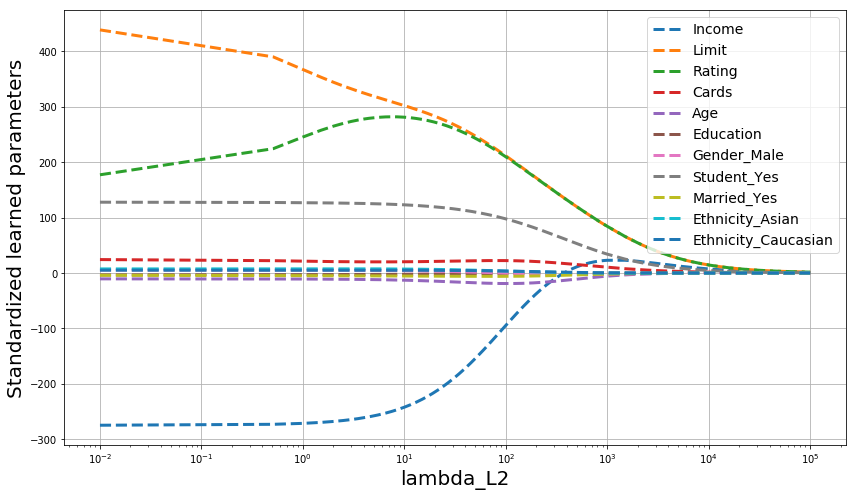

In [54]:
plt.figure(num=1, figsize = (14,8))
for ii in range(1,n):
    plt.semilogx(lambda_arr , W_arr[ii,:], '--', linewidth=3, label= (X.columns[ii]))
plt.legend(fontsize=14)
plt.xlabel('lambda_L2', fontsize=20)
plt.ylabel('Standardized learned parameters', fontsize=20)
plt.grid()
plt.show()



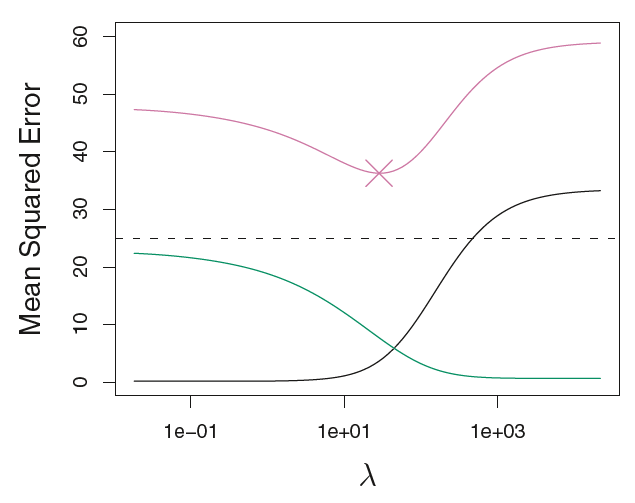

In [55]:
Image('RegularizationOptimalSpot_BiasVariance.png')

### Use the sklearn package to learn the fitting parameters for various level of L1 regularization 

In [56]:
from sklearn.linear_model import Lasso

In [57]:
N_lambda  = 201
lambda_arr = np.linspace(1 , 500, N_lambda)


W_arr     = np.zeros((n , len(lambda_arr)))
for ii in range(len(lambda_arr)):
    mdl        = Lasso(alpha=lambda_arr[ii])
    mdl_fitted = mdl.fit(X,y)
    W_arr[:,ii] = mdl_fitted.coef_
      

### Plot the learned parameters as a function of regularization parameter

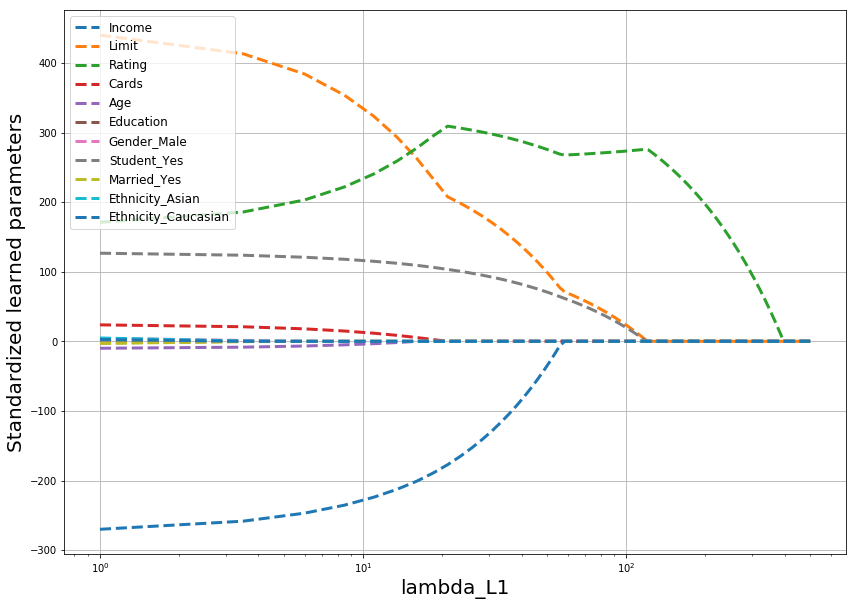

In [58]:
plt.figure(num=1, figsize = (14,10))
for ii in range(1,n):
    plt.semilogx(lambda_arr , W_arr[ii,:], '--', linewidth=3, label= (X.columns[ii]))
plt.legend(fontsize=12)
plt.xlabel('lambda_L1', fontsize=20)
plt.ylabel('Standardized learned parameters', fontsize=20)
plt.grid()
plt.show()



# L1 and L2: constrained optimizations

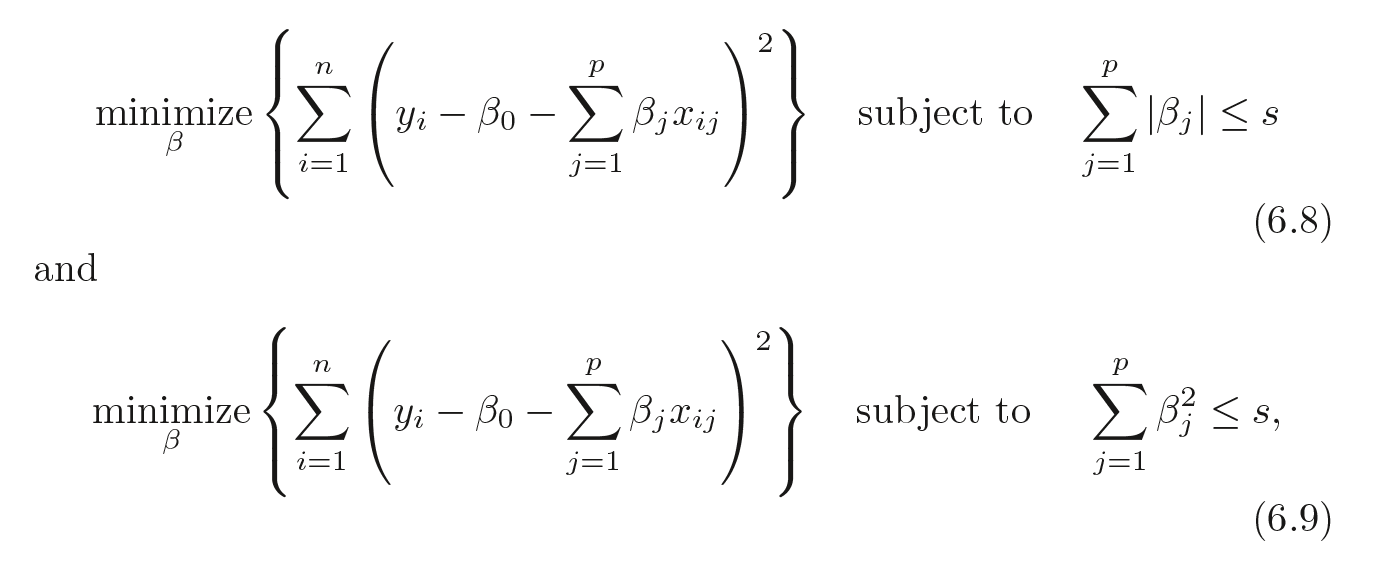

In [59]:
Image('L1 and L2 constrained optimization.png')

# Model sparsity due to L1 

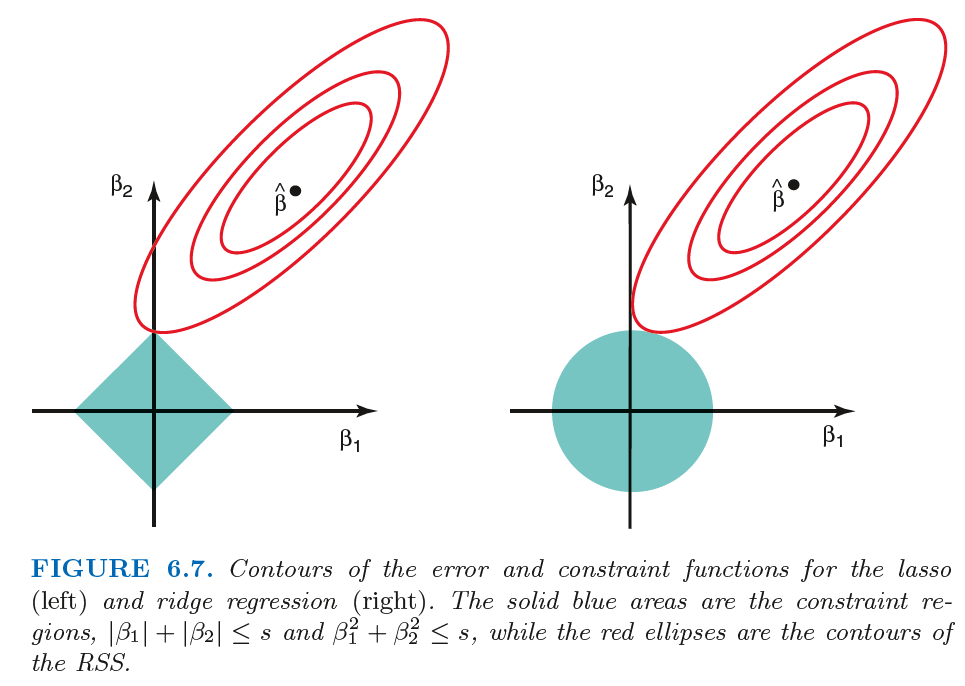

In [60]:
Image('L1 and L2 Model Sparsity of L1.png')

# Using Hitters Data

In [61]:
# Load the credit data 
print('Original DataFrame', 10*'-')
DF = pd.read_csv('Hitters.csv')
DF = DF[np.isfinite(DF.Salary)]

# Put the dependent variable i.e. salary as the last column in the dataframe 
clmns = list(DF.columns)[:-2] 
clmns.append(list(DF.columns)[-1])
clmns.append(list(DF.columns)[-2])
DF    = DF.reindex(columns=clmns)
display(DF.head())

# -----------------------------------------------------

# Predictor variables
print(' ')
print('Predictors', 10*'-')
x = DF.iloc[: , :-1]
display(x.head())

# -----------------------------------------------------

# Response variables
print(' ')
print('Response variable', 10*'-')
y = DF.iloc[: , -2:].drop(list(DF.columns)[-2], axis=1)
display(y.head())

Original DataFrame ----------


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A,750.0


 
Predictors ----------


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A


 
Response variable ----------


,Salary
1,475.0
2,480.0
3,500.0
4,91.5
5,750.0


### Dummify the cat variables and return the list of num , cat variable names 

In [62]:
x_all_num , nums, cats = dummify(x)

display(nums)
display(cats)
display(x_all_num.head())

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

['League', 'Division', 'NewLeague']

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


,Bias,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,1,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352,1.058758,0.981166,1.075052
2,1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964,-0.944503,0.981166,-0.930187
3,1,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219,1.058758,-1.019196,1.075052
4,1,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566,1.058758,-1.019196,1.075052
5,1,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147,-0.944503,0.981166,-0.930187


- m: 263
- n: 20
- means: [4.03642586e+02 1.07828897e+02 1.16197719e+01 5.47452471e+01
 5.14866920e+01 4.11140684e+01 7.31178707e+00 2.65754373e+03
 7.22186312e+02 6.92395437e+01 3.61220532e+02 3.30418251e+02
 2.60266160e+02 2.90711027e+02 1.18760456e+02 8.59315589e+00
 4.71482890e-01 5.09505703e-01 4.63878327e-01]
- stds: [1.47026890e+02 4.50394546e+01 8.74044338e+00 2.54912146e+01
 2.58334607e+01 2.16767277e+01 4.78449391e+00 2.28223167e+03
 6.46966151e+02 8.20411635e+01 3.30568316e+02 3.22752315e+02
 2.63553383e+02 2.79401874e+02 1.44804495e+02 6.59400225e+00
 4.99186112e-01 4.99909633e-01 4.98693518e-01]


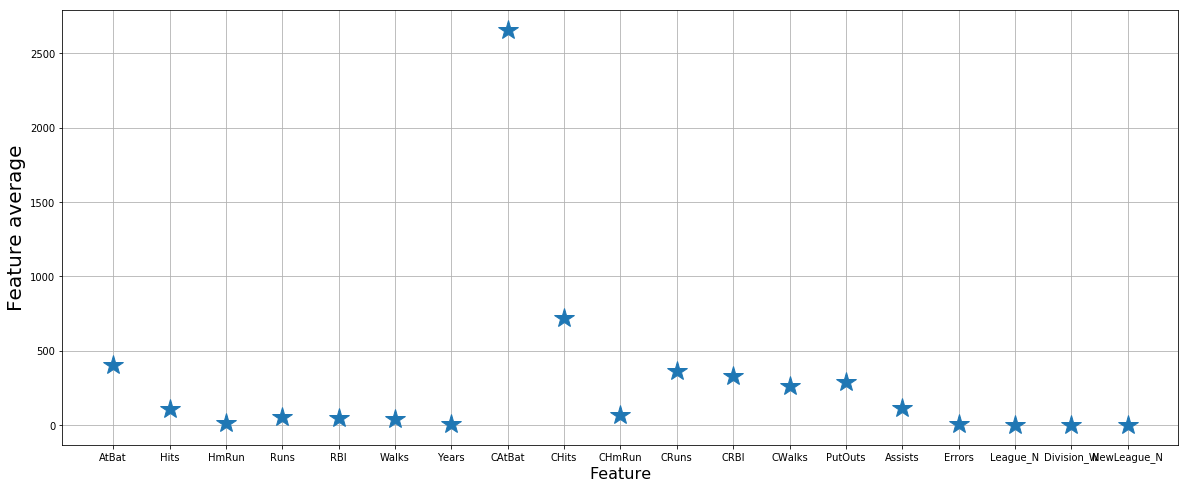

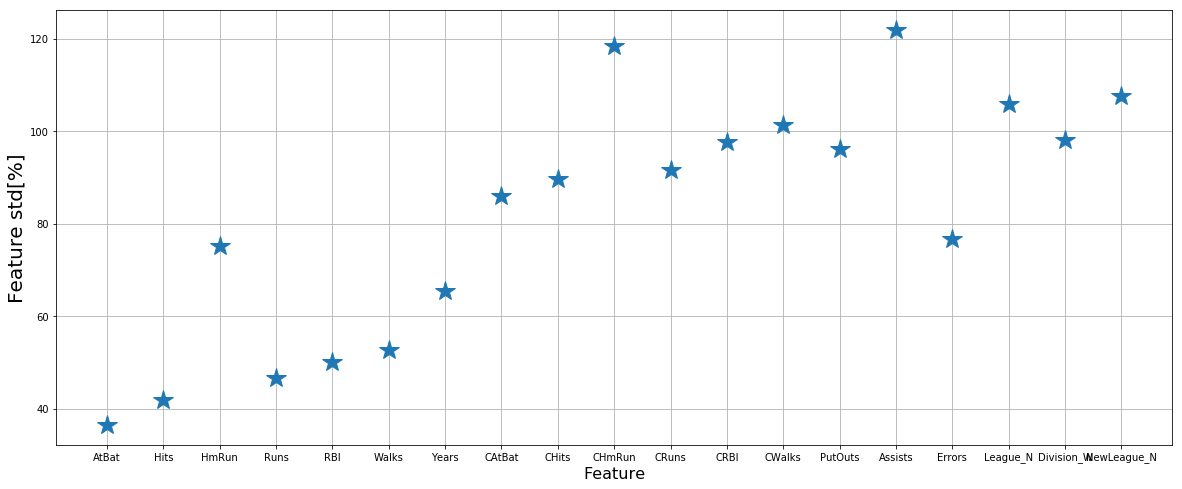

In [63]:
X, m, n, means, stds = Standardize(x_all_num)
display(X.head())
print('- m:', m)
print('- n:', n)
print('- means:', means)
print('- stds:',  stds)




plt.figure(num=1, figsize=(20,8))
plt.plot(X.columns[1:], means, '*', markersize=20)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Feature average', fontsize=20)
plt.grid()


plt.figure(num=2, figsize=(20,8))
plt.plot(X.columns[1:], stds/means*100, '*', markersize=20)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Feature std[%]', fontsize=20)
plt.grid()

In [64]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Use sklearn Ridge Regression to learn the fitting parameters for various level of L2 regularization 

In [65]:
N_lambda  = 201
lambda_arr = np.linspace(50 , 1e3, N_lambda)
lambda_arr = np.append(lambda_arr,  np.linspace(1e3 , 8e5, N_lambda))

W_arr     = np.zeros((n , len(lambda_arr)))
for ii in range(len(lambda_arr)):
    mdl        = Ridge(alpha=lambda_arr[ii])
    mdl_fitted = mdl.fit(X,y)
    W_arr[:,ii] = mdl_fitted.coef_
      
    


### Plot the learned parameters as a function of L2 regularization parameter

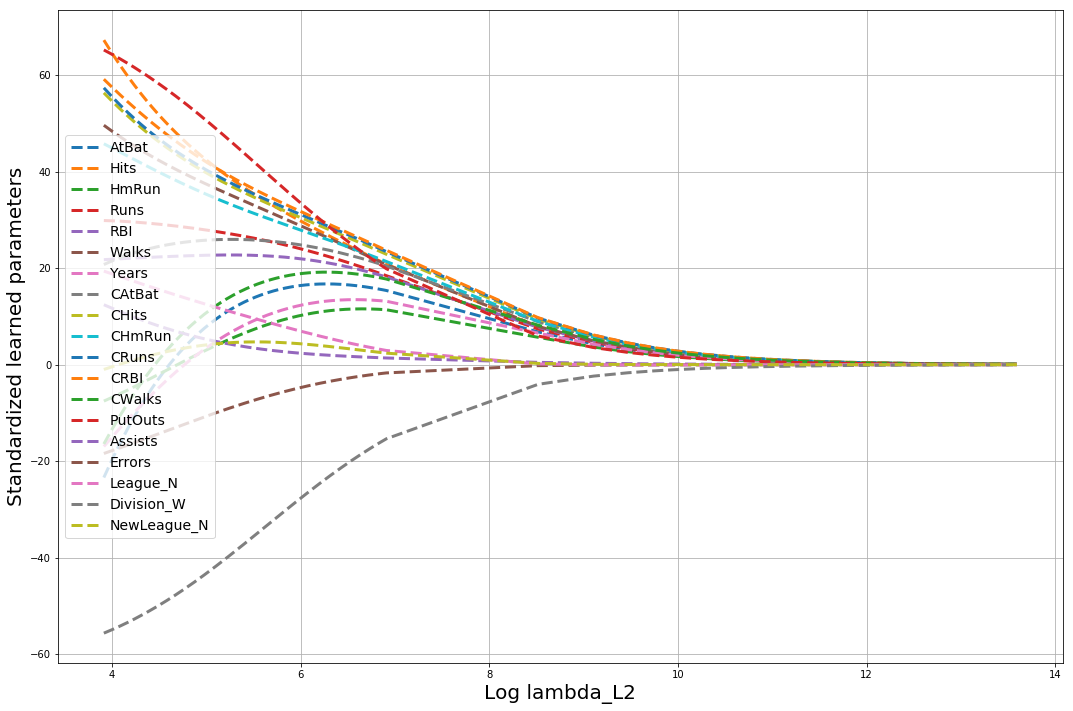

In [66]:
plt.figure(num=1, figsize = (18,12))
for ii in range(1,n):
    plt.plot(np.log(lambda_arr) , W_arr[ii,:], '--', linewidth=3, label= (X.columns[ii]))
plt.legend(fontsize=14, loc='center left')
plt.xlabel('Log lambda_L2', fontsize=20)
plt.ylabel('Standardized learned parameters', fontsize=20)
plt.grid()
plt.show()

# Import cross_validate

In [128]:
from sklearn.model_selection import cross_validate

# Find the test MSE vs regularization strength 

In [129]:
N_lambda  = 201
lambda_arr = np.linspace(50 , 1e3, N_lambda)
lambda_arr = np.append(lambda_arr,  np.linspace(1e3 , 8e5, N_lambda))
mse_arr     = np.zeros((len(lambda_arr),))
std_mse_arr = np.zeros((len(lambda_arr),))

W_arr     = np.zeros((n , len(lambda_arr)))
for ll in range(len(lambda_arr)):
    #print(round(ll/len(lambda_arr)*100))
    mdl    = Ridge(alpha=lambda_arr[ll])
    scores = cross_validate(mdl, X=X, y=y, scoring='neg_mean_squared_error', n_jobs=-1, cv=8, return_train_score = False)
    mse_arr[ll]     = -np.mean(scores['test_score'])
    std_mse_arr[ll] = np.std(scores['test_score'])
    


# Plot MSE vs regularization strength

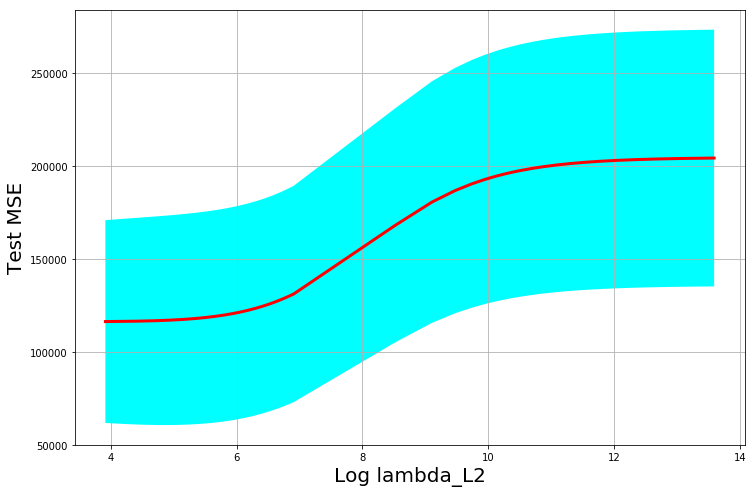

In [130]:
plt.figure(num=1, figsize = (12,8))
plt.plot(np.log(lambda_arr), mse_arr,'r', linewidth=3)
plt.fill_between(np.log(lambda_arr), mse_arr - 1*std_mse_arr , mse_arr + 1*std_mse_arr, facecolor='cyan' )
plt.xlabel('Log lambda_L2', fontsize=20)
plt.ylabel('Test MSE', fontsize=20)
plt.grid()
plt.show()

### Use sklearn Lasso to learn the fitting parameters for various level of L1 regularization 

In [138]:
N_lambda  = 251
lambda_arr = np.linspace(1 , 250, N_lambda)

W_arr     = np.zeros((n , len(lambda_arr)))
for ii in range(len(lambda_arr)):
    mdl        = Lasso(alpha=lambda_arr[ii])
    mdl_fitted = mdl.fit(X,y)
    W_arr[:,ii] = mdl_fitted.coef_
      

### Plot the learned parameters as a function of regularization parameter

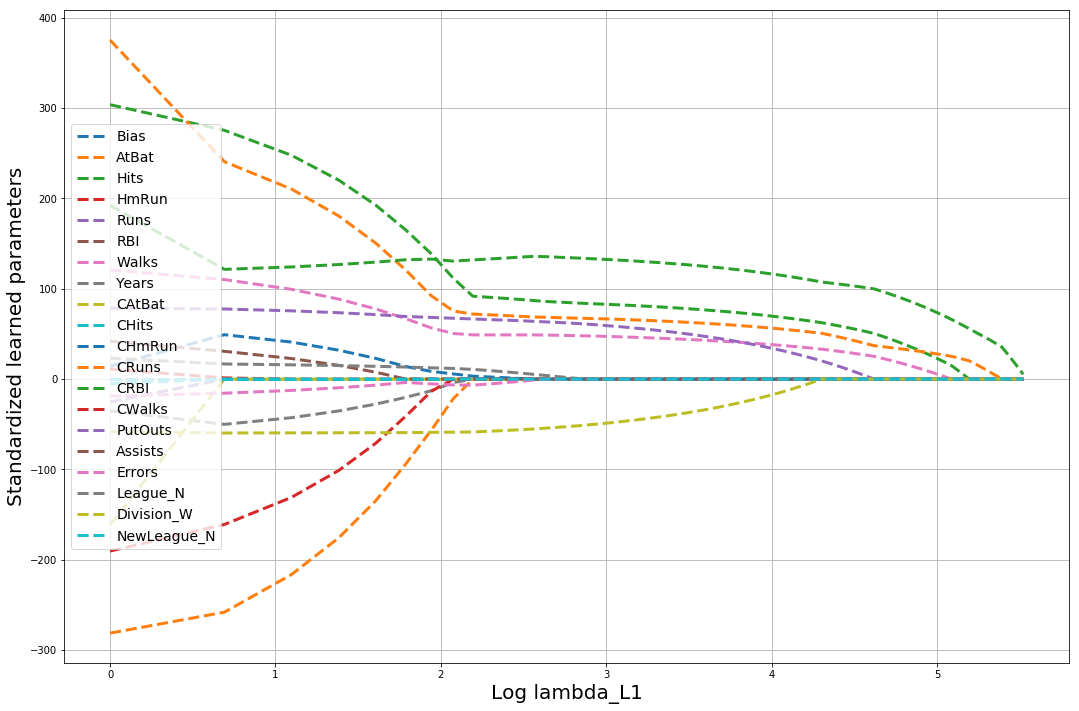

In [139]:
plt.figure(num=1, figsize = (18,12))
for ii in range(n):
    plt.plot(np.log(lambda_arr) , W_arr[ii,:], '--', linewidth=3, label= (X.columns[ii]))
plt.legend(fontsize=14, loc='center left')
plt.xlabel('Log lambda_L1', fontsize=20)
plt.ylabel('Standardized learned parameters', fontsize=20)
plt.grid()
plt.show()

# Find the test MSE vs regularization strength 

In [142]:
mse_arr     = np.zeros((len(lambda_arr),))
std_mse_arr = np.zeros((len(lambda_arr),))

W_arr     = np.zeros((n , len(lambda_arr)))
for ll in range(len(lambda_arr)):
    #print(round(ll/len(lambda_arr)*100))
    mdl    = Lasso(alpha=lambda_arr[ll])
    scores = cross_validate(mdl, X=X, y=y, scoring='neg_mean_squared_error', n_jobs=-1, cv=8, return_train_score = False)
    mse_arr[ll]     = -np.mean(scores['test_score'])
    std_mse_arr[ll] = np.std(scores['test_score'])

# Plot MSE vs regularization strength

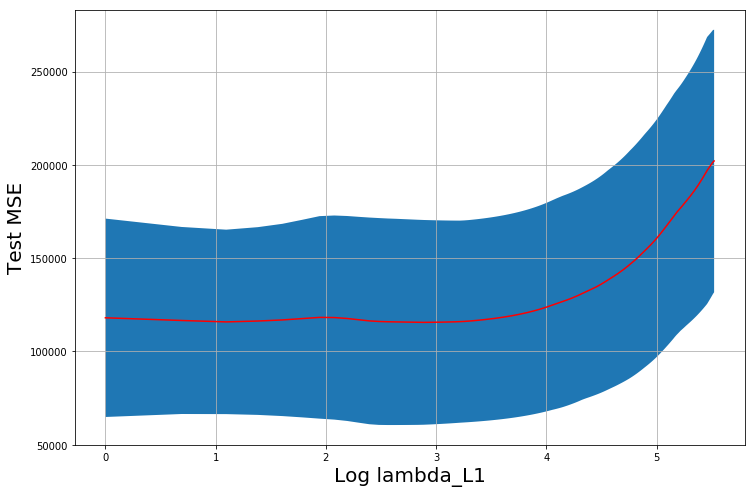

In [143]:
plt.figure(num=1, figsize = (12,8))
plt.plot(np.log(lambda_arr), mse_arr,'r')
plt.fill_between(np.log(lambda_arr), mse_arr - 1*std_mse_arr , mse_arr + 1*std_mse_arr )
plt.xlabel('Log lambda_L1', fontsize=20)
plt.ylabel('Test MSE', fontsize=20)
plt.grid()
plt.show()